Machine Learning Assignment 

---

Achuth Dintakurthi

---
9919004066

---

II-D-CSE 


In [40]:
import pandas as pd

DataSet Link

**[https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection](https://)**

In [2]:
data = pd.read_csv('SMSSpamCollection' , sep="\t" , names=["label","message"])

In [3]:
data

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


### **Text PreProcessing**

In [4]:
import re
import nltk

In [5]:
#data preprocessing
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [6]:
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
ps = PorterStemmer()
emptylist = []
for i in range(0 , len(data)):
  cleaning = re.sub('[^a-zA-Z]',' ',data['message'][i])
  cleaning = cleaning.lower()
  cleaning = cleaning.split()
  cleaning = [ps.stem(word) for word in cleaning if word not in set(stopwords.words('english'))]
  cleaning = " ".join(cleaning)
  emptylist.append(cleaning)

In [7]:
emptylist

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun',
 'winner valu network custom select receivea prize reward claim call claim code kl valid hour',
 'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free',
 'gonna home soon want talk stuff anymor tonight k cri enough today',
 'six chanc win cash pound txt csh send cost p day day tsandc appli repli hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw',
 'search right word thank breather

In [16]:
#bag of model
from sklearn.feature_extraction.text import CountVectorizer
final_matrix = CountVectorizer(max_features=4000).fit_transform(emptylist).toarray()
final_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [17]:
out_put = pd.get_dummies(data['label'])
out_put = out_put.iloc[:,1].values

In [18]:
out_put

array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

In [19]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(final_matrix , out_put , test_size = 0.2 , random_state = 50)

### **Navie** **Bayes**

In [20]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB().fit(x_train , y_train)

In [21]:
y_pred = model.predict(x_test)

In [24]:
from sklearn import metrics
print("Accuracy", metrics.accuracy_score(y_test , y_pred))

Accuracy 0.9775784753363229


In [26]:
from sklearn.metrics import confusion_matrix
print("confusion matrxi" )
print(confusion_matrix(y_test,y_pred))

confusion matrxi
[[952  18]
 [  7 138]]


In [34]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       970
           1       1.00      0.88      0.93       145

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



### **SVC**

In [27]:
#support vector classifier
from sklearn import svm

In [30]:
svc = svm.SVC(kernel='rbf').fit(x_train, y_train)

In [32]:
y_pred = svc.predict(x_test)

In [33]:
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[970   0]
 [ 18 127]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       970
           1       1.00      0.88      0.93       145

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115

0.9838565022421525


### **Random Forest Classifier**

In [36]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=20, random_state=50)
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)

In [37]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[970   0]
 [ 24 121]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       970
           1       1.00      0.83      0.91       145

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115

0.97847533632287


### **Decision Tree Classifier**

In [38]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
y_pred = dtc.predict(x_test)

In [39]:
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[961   9]
 [ 18 127]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       970
           1       0.93      0.88      0.90       145

    accuracy                           0.98      1115
   macro avg       0.96      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115

0.9757847533632287


### **ROC AUC CURVE**

In [48]:
#prediction probabilites
rfc_probs = rfc.predict_proba(x_test) #random forest model
nb_probs = model.predict_proba(x_test) #navie bayies model
dc_probs = dtc.predict_proba(x_test) #decision tree model


*keeping the positive outcomes*

In [49]:
rfc_probs = rfc_probs[:,1]
nb_probs = nb_probs[:,1]
dc_probs = dc_probs[:,1]

In [50]:
from sklearn.metrics import roc_auc_score , roc_curve

*claculating AUROC*

In [53]:
rfc_auc = roc_auc_score(y_test,rfc_probs)
nb_auc = roc_auc_score(y_test,nb_probs)
dcc_auc = roc_auc_score(y_test,dc_probs)
print("AUROC of Random Forest Classifier : %.3f" %(rfc_auc))
print("AUROC of Decision Tree Classifier : %.3f" %(dcc_auc))
print("AUROC of Navie Bayies Classifier : %.3f" %(nb_auc))

AUROC of Random Forest Classifier : 0.987
AUROC of Decision Tree Classifier : 0.933
AUROC of Navie Bayies Classifier : 0.983


*ROC Curve*

In [54]:
rfc_fpr , rfc_tpr , _  = roc_curve(y_test, rfc_probs)
dcc_fpr , dcc_tpr , _  = roc_curve(y_test, dc_probs)
nb_fpr , nb_tpr , _  = roc_curve(y_test, nb_probs)

**ROC Curve Plot**

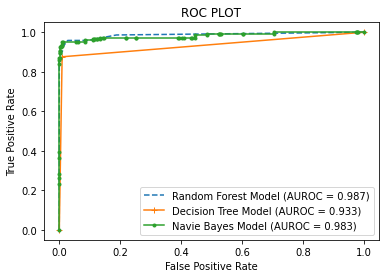

In [60]:
import matplotlib.pyplot as plt
plt.plot(rfc_fpr , rfc_tpr , linestyle = '--' , label="Random Forest Model (AUROC = %0.3f)"%rfc_auc)
plt.plot(dcc_fpr , dcc_tpr , marker = '+' ,label="Decision Tree Model (AUROC = %0.3f)"%dcc_auc)
plt.plot(nb_fpr , nb_tpr , marker = '.' ,label="Navie Bayes Model (AUROC = %0.3f)"%nb_auc)
plt.title("ROC PLOT")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()